# The Strory of Adult Income

In [261]:
# All my files to Import
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from matplotlib.ticker import MultipleLocator

In [2]:
df= pd.read_csv("adult.csv")


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.shape

(48842, 15)

# Cleaning Data

In [8]:
df.head().isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df["age"].unique()

array([25, 38, 28, 44, 18, 34, 29, 63, 24, 55, 65, 36, 26, 58, 48, 43, 20,
       37, 40, 72, 45, 22, 23, 54, 32, 46, 56, 17, 39, 52, 21, 42, 33, 30,
       47, 41, 19, 69, 50, 31, 59, 49, 51, 27, 57, 61, 64, 79, 73, 53, 77,
       80, 62, 35, 68, 66, 75, 60, 67, 71, 70, 90, 81, 74, 78, 82, 83, 85,
       76, 84, 89, 88, 87, 86], dtype=int64)

In [10]:
df["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [11]:
df["education"].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [12]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [13]:
df["race"].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [14]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [75]:
df['gender']=df['gender'].map({'Male': 0, 'Female': 1, 'Male': 0, 'Female': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,0,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,1,0,0,30,United-States,0


In [15]:
df["hours-per-week"].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

In [16]:
df["native-country"].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [17]:
df["income"].unique()

array(['<=50K', '>50K'], dtype=object)

Might need to fix this data before modeling it.

In [25]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


0= is for less than 50,000
1= is for greater than 50,000
will use this in a new df later, but first will try to find the most important features 

# EDA

In [26]:
sns.pairplot(df)


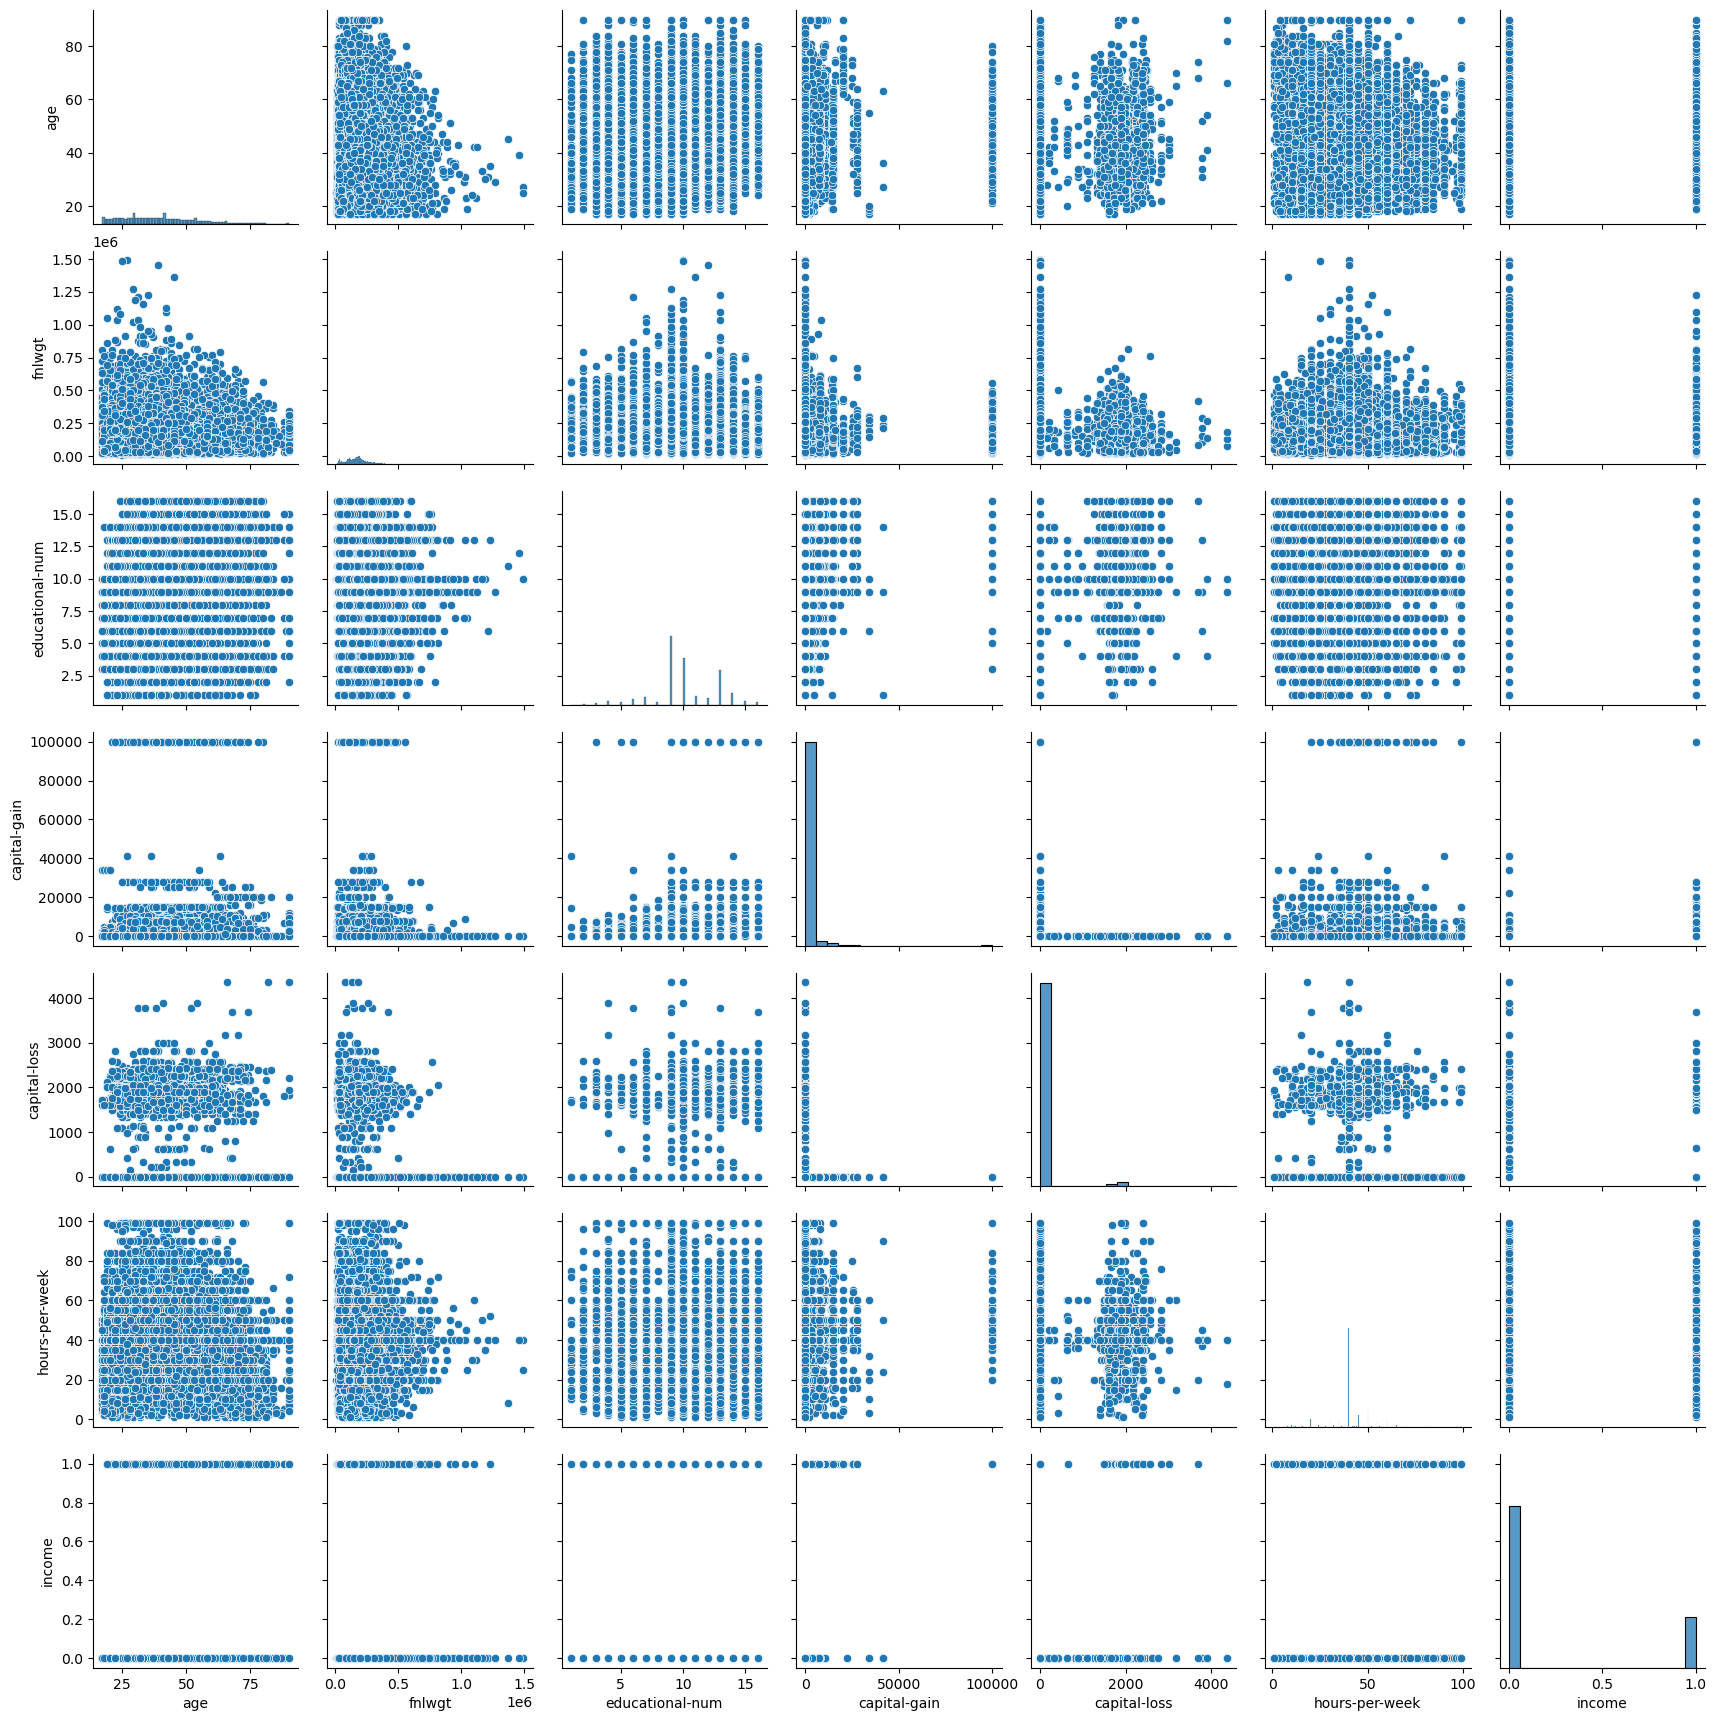

In [27]:
plt.show()

In [29]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

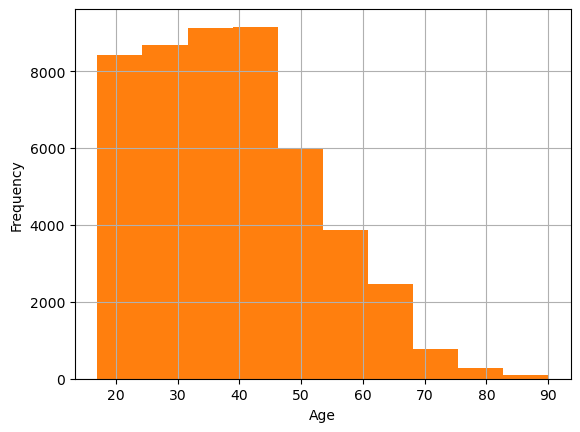

In [238]:
df["age"].hist()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("")
plt.show()

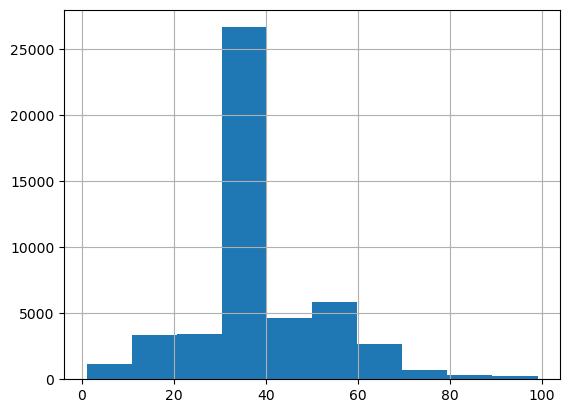

In [35]:
df["hours-per-week"].hist()
plt.show()

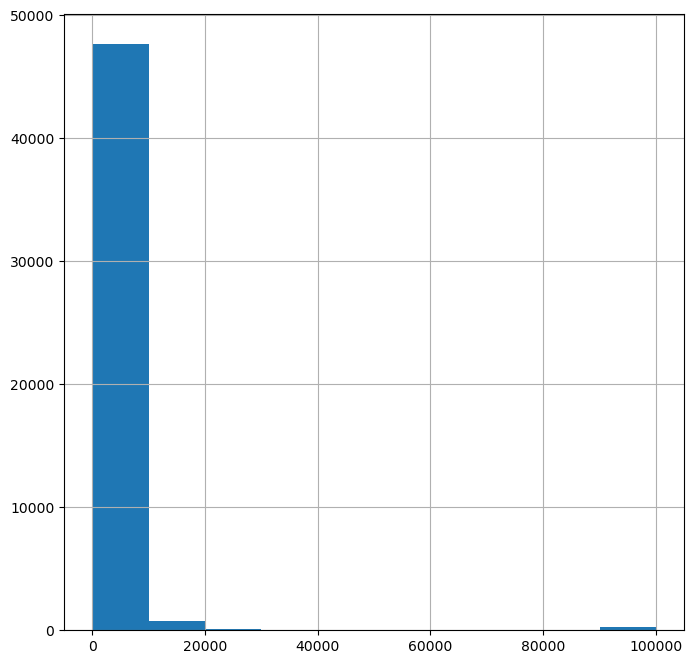

In [36]:
df["capital-gain"].hist(figsize=(8,8))
plt.show()

<Figure size 1200x800 with 0 Axes>

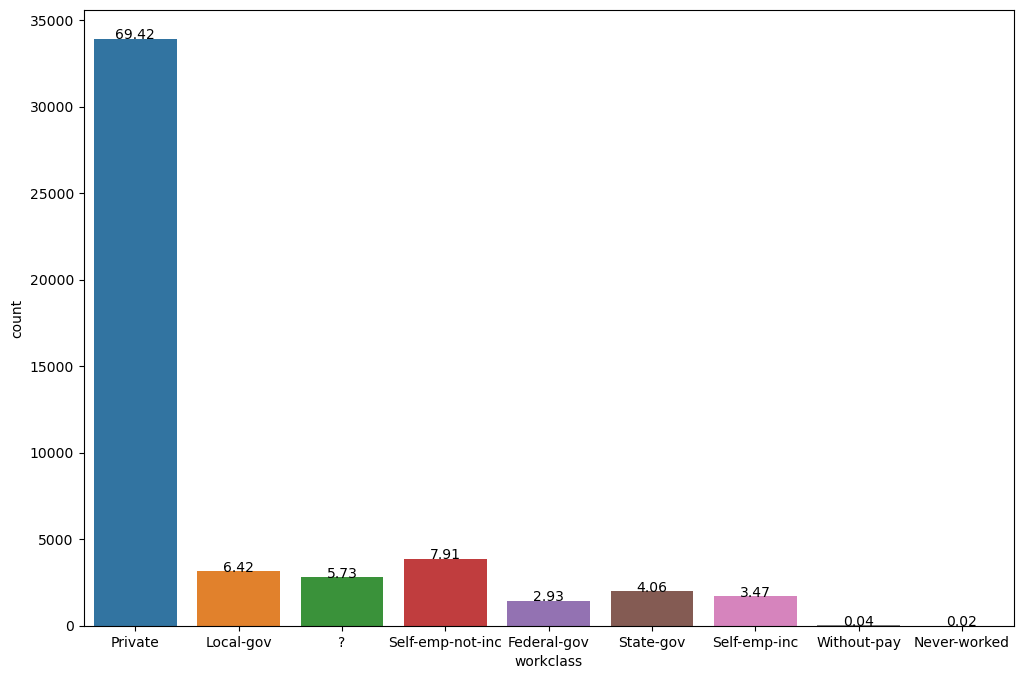

In [43]:
plt.figure(figsize=(12,8))

total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

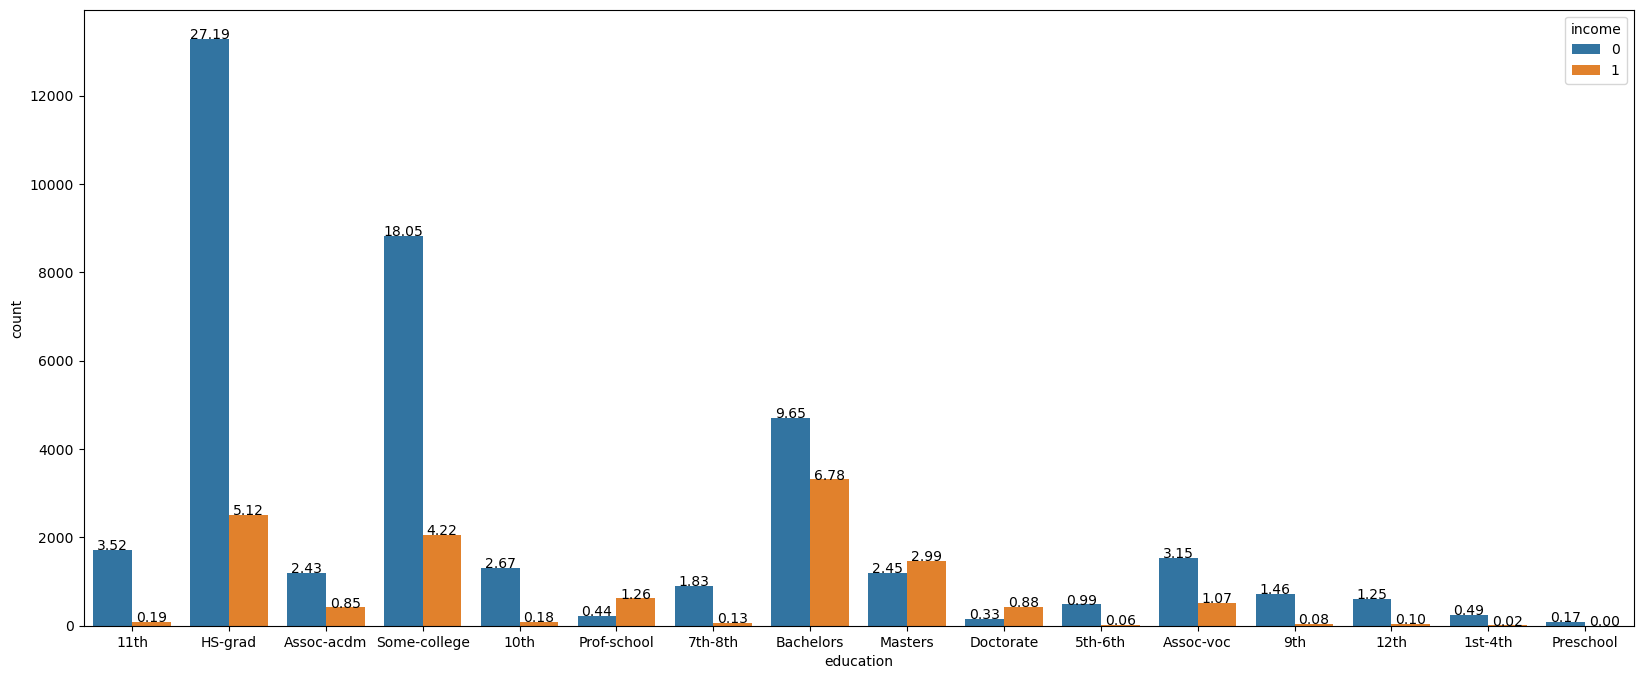

In [254]:
plt.figure(figsize=(20,8))
total = float(len(df["income"]) )

ax = sns.countplot(x="education", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

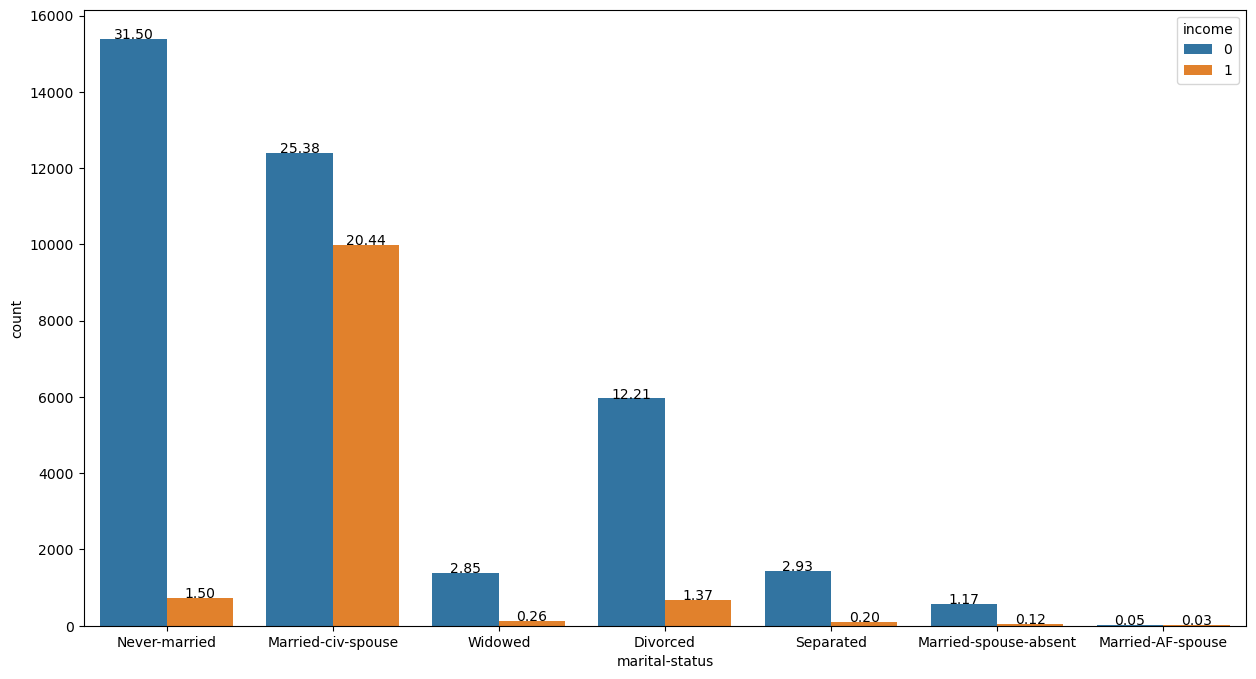

In [256]:
plt.figure(figsize=(15,8))
total= float(len(df))

ax = sns.countplot(x="marital-status", hue= "income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

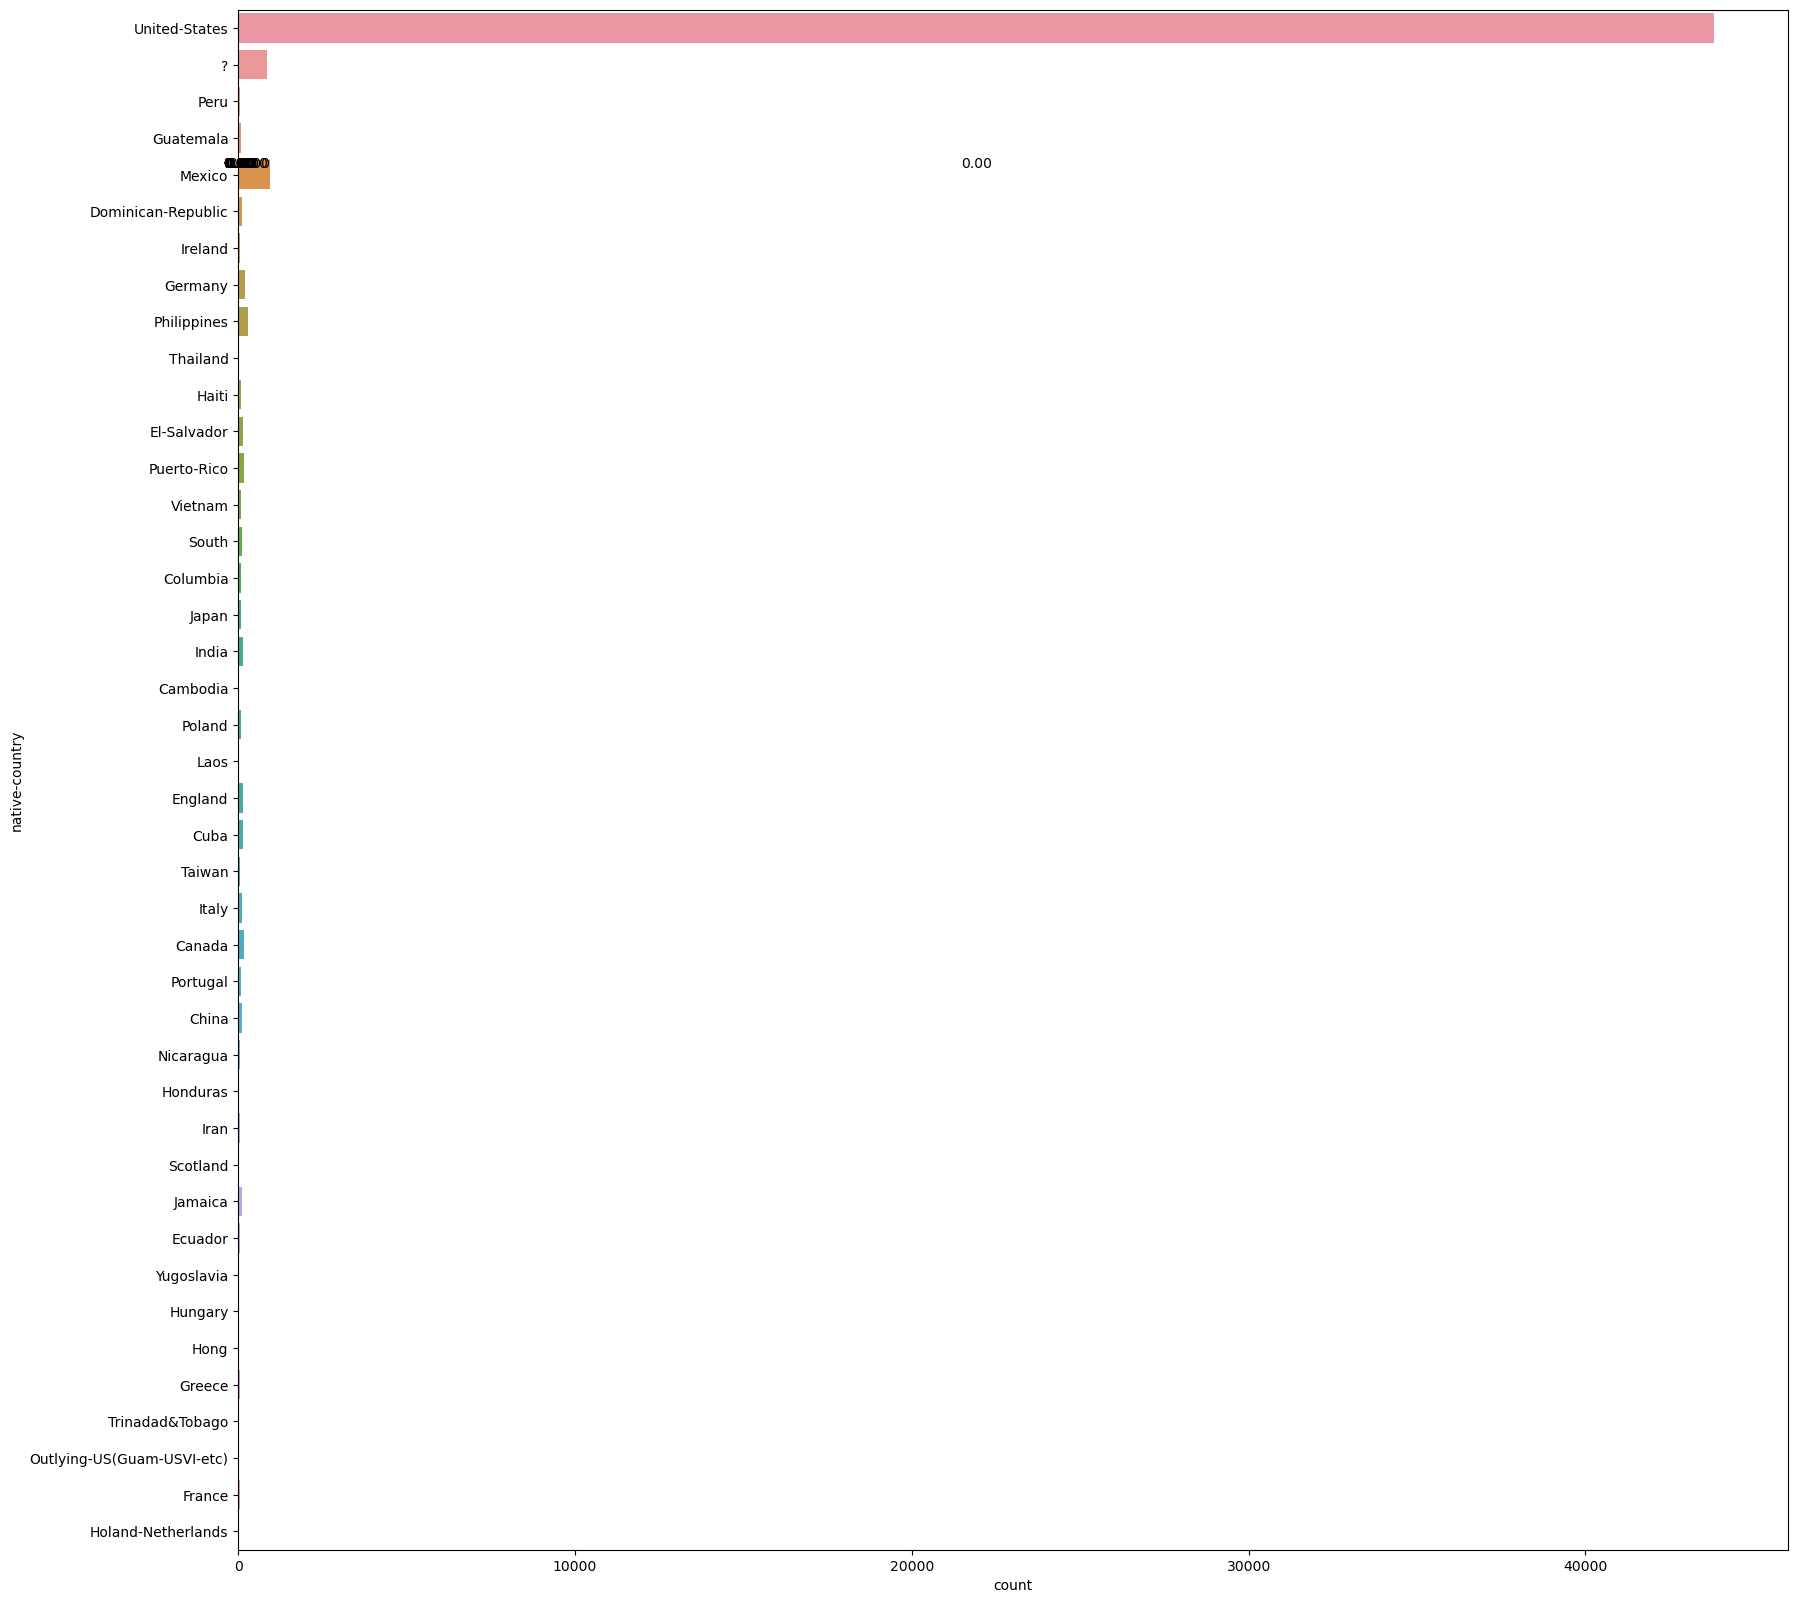

In [263]:
plt.figure(figsize=(20,20))
total = float(len(df) )

ax = sns.countplot(y="native-country", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


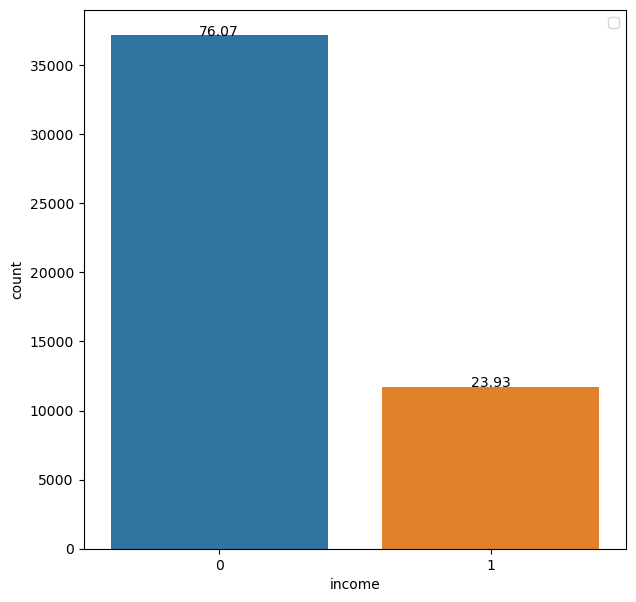

In [195]:
plt.figure(figsize=(7,7))
total = float(len(df) )

ax = sns.countplot(x="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 

plt.show()

In [59]:
corr= df.corr()

In [62]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [76]:
data = {'age':df["age"],"gender":df["gender"],'fnlwgt': df["fnlwgt"], 'educational-num': df["educational-num"],'capital-gain': df["capital-gain"],'capital-loss': df["capital-loss"],'hours-per-week': df['hours-per-week'], "income": df["income"]}

In [79]:
data =pd.DataFrame(data)

In [80]:
data_corr= data.corr()

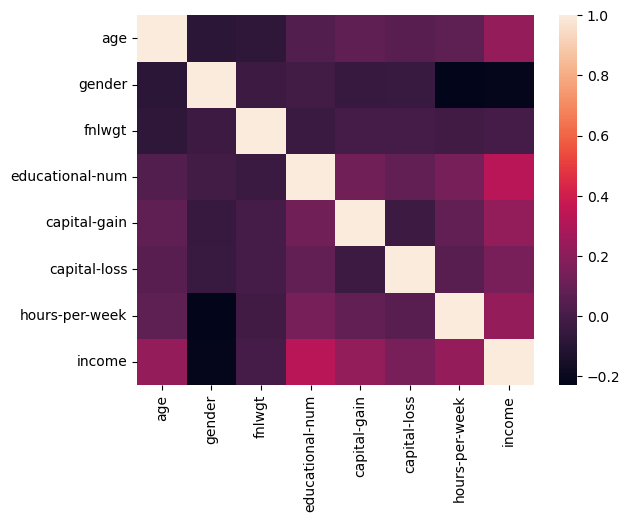

In [83]:
sns.heatmap(data_corr)
plt.show()

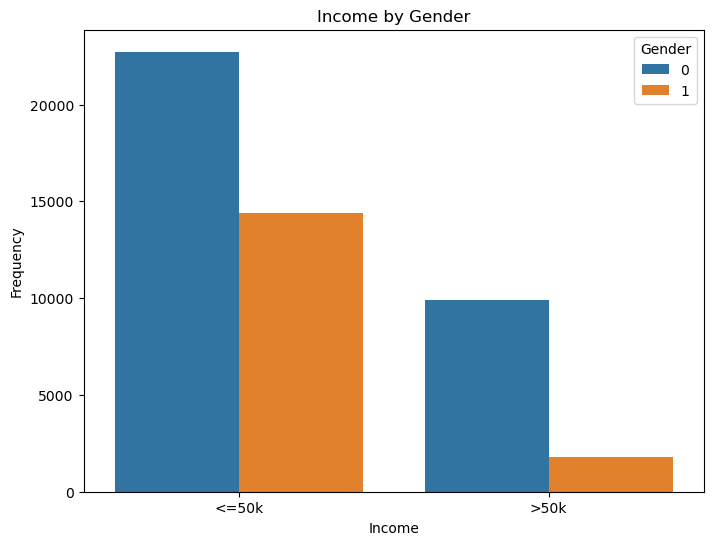

In [242]:
# Create a countplot with income on the x-axis, hue as gender, and frequency on the y-axis
plt.figure(figsize=(8, 6))
sns.countplot(x='income', hue='gender', data=df)
plt.title('Income by Gender')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['<=50k', '>50k'])
plt.legend(title='Gender')
plt.show()

In [245]:
df["hours-per-week"].unique()

array([40, 50, 30, 32, 10, 39, 35, 48, 25, 20, 45, 47,  6, 43, 90, 54, 60,
       38, 36, 18, 24, 44, 56, 28, 16, 41, 22, 55, 14, 33, 37,  8, 12, 70,
       15, 75, 52, 84, 42, 80, 68, 99, 65,  5, 17, 72, 53, 29, 96, 21, 46,
        3,  1, 23, 49, 67, 76,  7,  2, 58, 26, 34,  4, 51, 78, 63, 31, 92,
       77, 27, 85, 13, 19, 98, 62, 66, 57, 11, 86, 59,  9, 64, 73, 61, 88,
       79, 89, 74, 69, 87, 97, 94, 82, 91, 81, 95], dtype=int64)

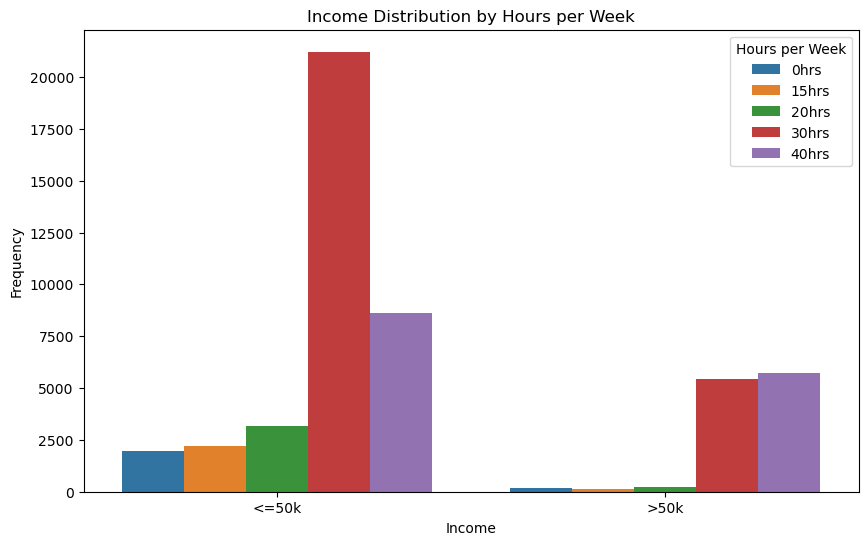

In [251]:
bin_edges = [0, 15, 20, 30, 40, float('inf')]

# Define labels for the bins
bin_labels = ['0hrs', '15hrs', '20hrs', '30hrs', '40hrs']

# Create a new column 'hours-per-week-bin' with the bin labels
df['hours-per-week-bin'] = pd.cut(df['hours-per-week'], bins=bin_edges, labels=bin_labels)

# Create a countplot with 'income' on the x-axis and 'hours-per-week-bin' as hue
plt.figure(figsize=(10, 6))
sns.countplot(x='income', hue='hours-per-week-bin', data=df, order=[0, 1])
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['<=50k', '>50k'])
plt.legend(title='Hours per Week', labels=bin_labels)
plt.show()

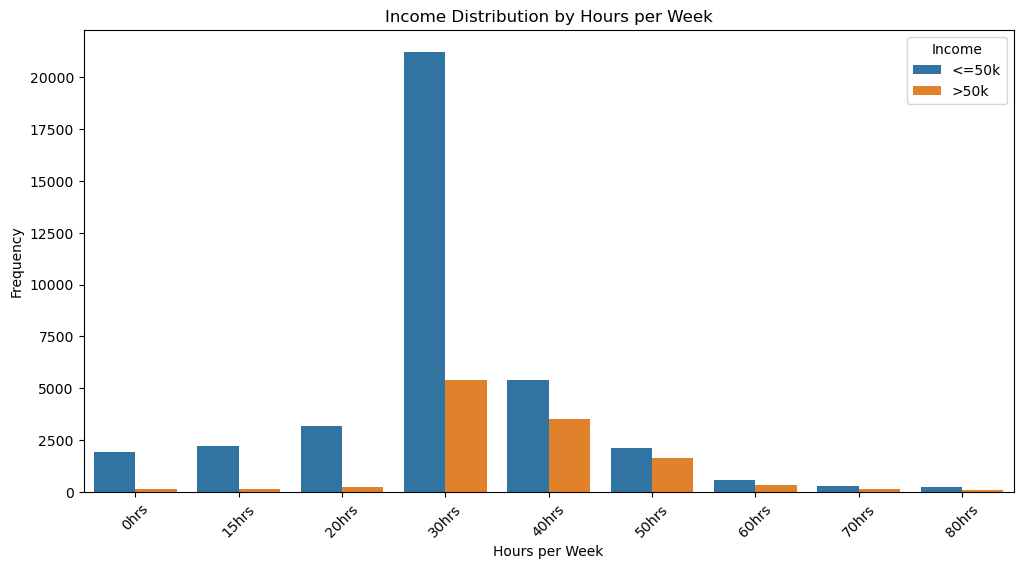

In [253]:
bin_edges = [0, 15, 20, 30, 40, 50, 60, 70, 80, float('inf')]

# Define updated labels for the bins (one fewer than the bin edges)
bin_labels = ['0hrs', '15hrs', '20hrs', '30hrs', '40hrs', '50hrs', '60hrs', '70hrs', '80hrs']

# Create a new column 'hours-per-week-bin' with the updated bin labels
df['hours-per-week-bin'] = pd.cut(df['hours-per-week'], bins=bin_edges, labels=bin_labels)

# Create a countplot with 'hours-per-week-bin' on the x-axis and 'income' as hue
plt.figure(figsize=(12, 6))
sns.countplot(x='hours-per-week-bin', hue='income', data=df)
plt.title('Income Distribution by Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.legend(title='Income', labels=['<=50k', '>50k'])
plt.xticks(rotation=45)
plt.show()

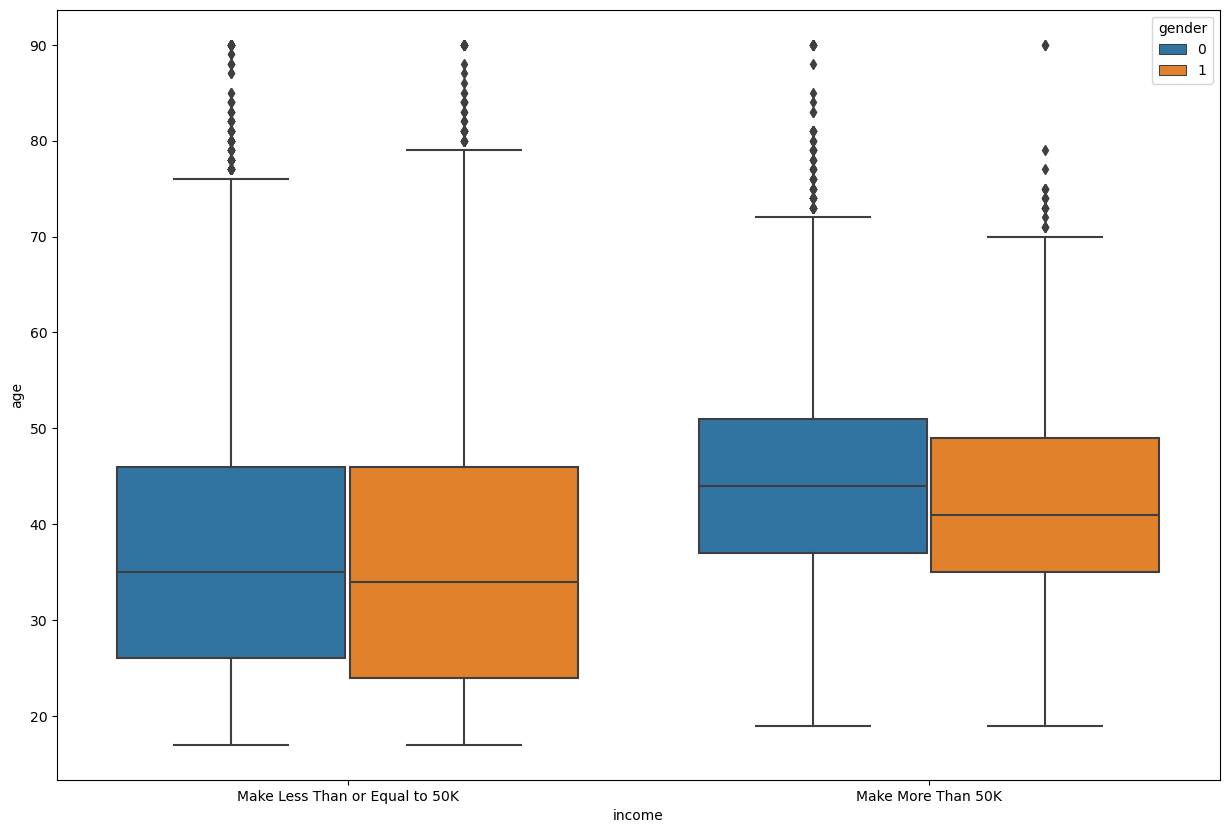

In [200]:
plt.figure(figsize=(15, 10))
boxplot = sns.boxplot(x="income", y="age", hue="gender", data=df)

# Set custom x-axis labels
boxplot.set_xticklabels(["Make Less Than or Equal to 50K", "Make More Than 50K"])

plt.show()

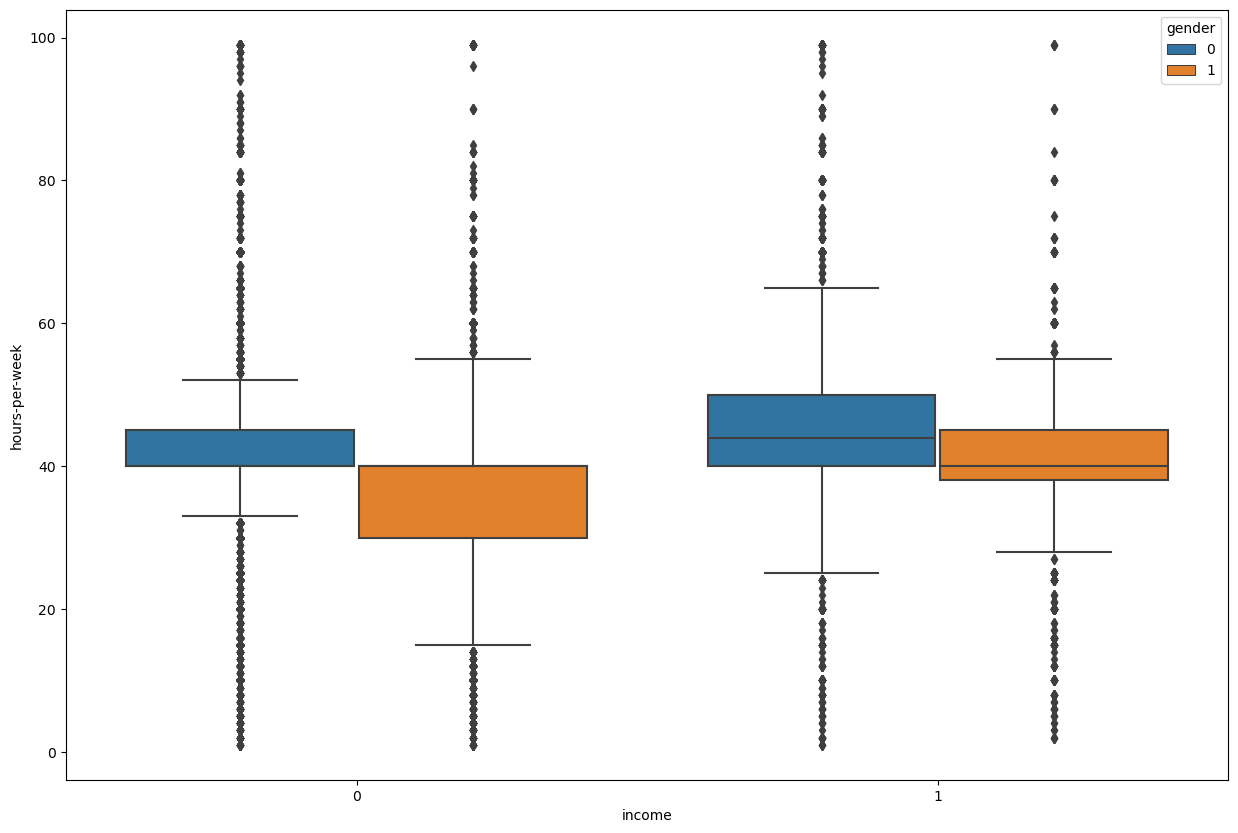

In [260]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="hours-per-week",hue="gender",data=df)
plt.show()

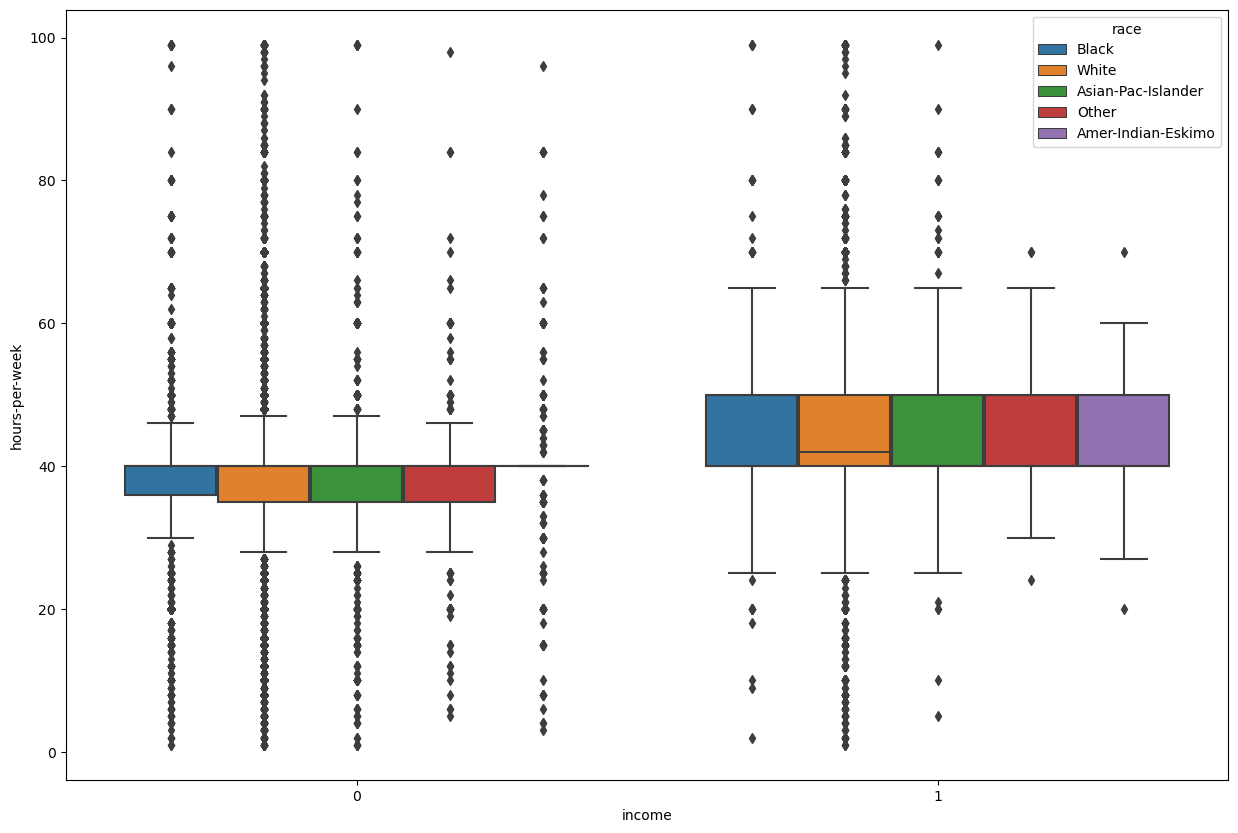

In [204]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="hours-per-week",hue="race",data=df)
plt.show()


<Figure size 800x600 with 0 Axes>

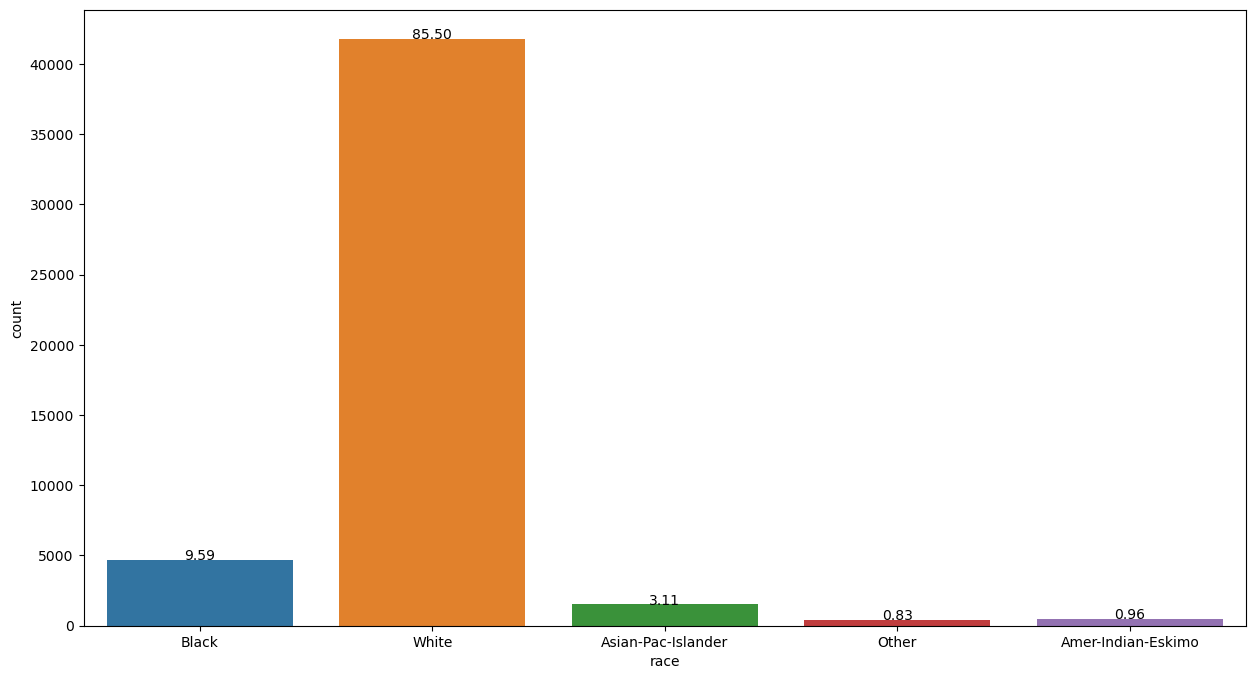

In [266]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

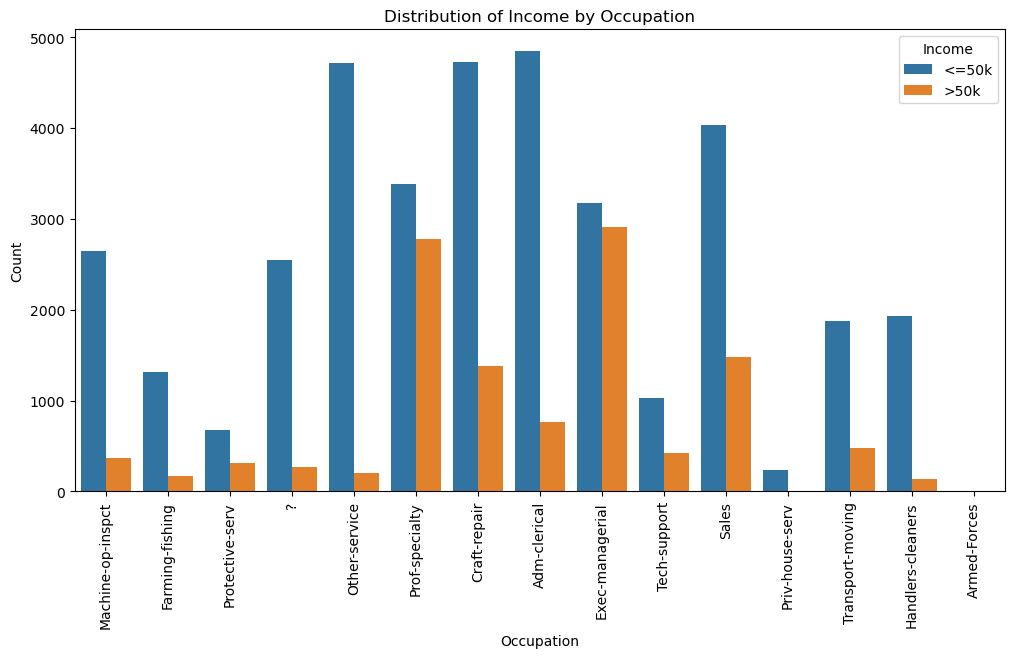

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Filter the DataFrame to select only individuals with income 0 or 1
df_filtered = df[df['income'].isin([0, 1])]

# Create a grouped bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='occupation', hue='income')
plt.title('Distribution of Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Income', labels=['<=50k', '>50k'])
plt.show()

<Figure size 1700x1000 with 0 Axes>

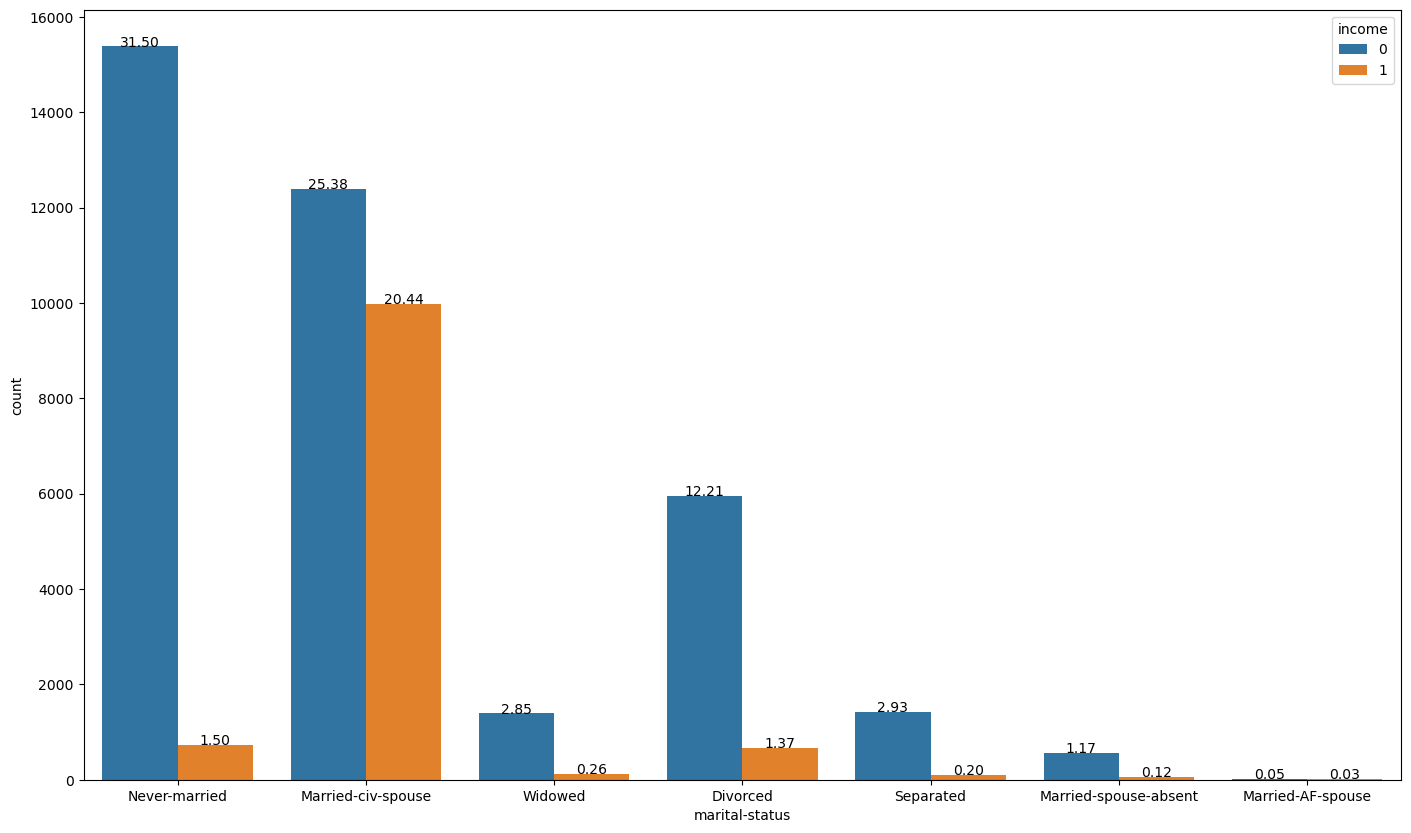

In [268]:
plt.figure(figsize=(17,10))
total = float(len(df) )

ax = sns.countplot(x="marital-status", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

# Modeling with PCA and KNN

Elbow graph to get components

In [104]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [107]:
pca= PCA()
pca.fit(scaled_data)

explained_variance = pca.explained_variance_ratio_

# Create an array of component numbers
components = np.arange(1, len(explained_variance) + 1)

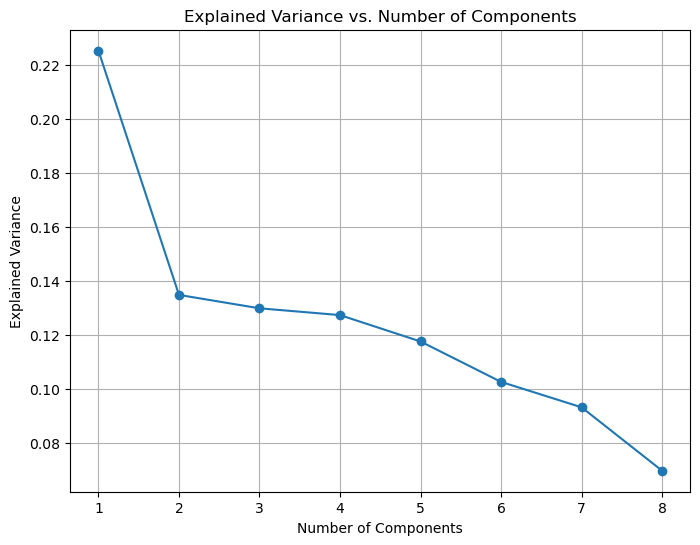

In [128]:
plt.figure(figsize=(8, 6))
plt.plot(components, explained_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

4 features seem to be best 

In [129]:
# Choose the number of clusters (K) based on your problem
n_clusters = 4  # Adjust as needed

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to your data and get cluster assignments
cluster_labels = kmeans.fit_predict(scaled_data)

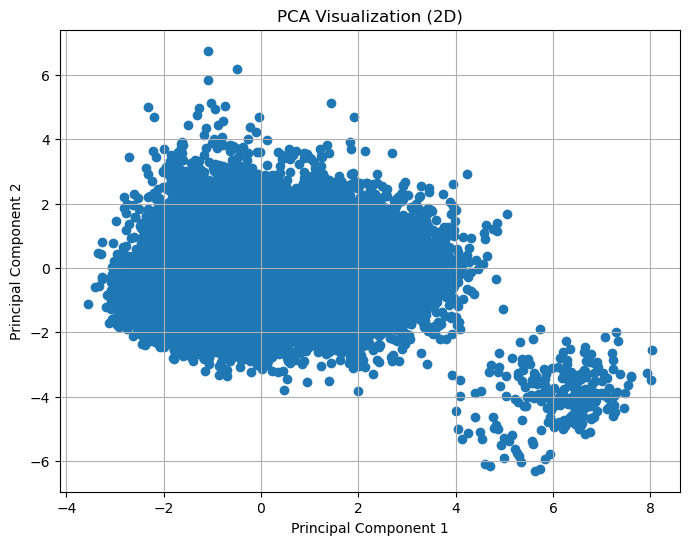

In [132]:
pca= PCA(n_components=4)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization (2D)')
plt.grid(True)
plt.show()


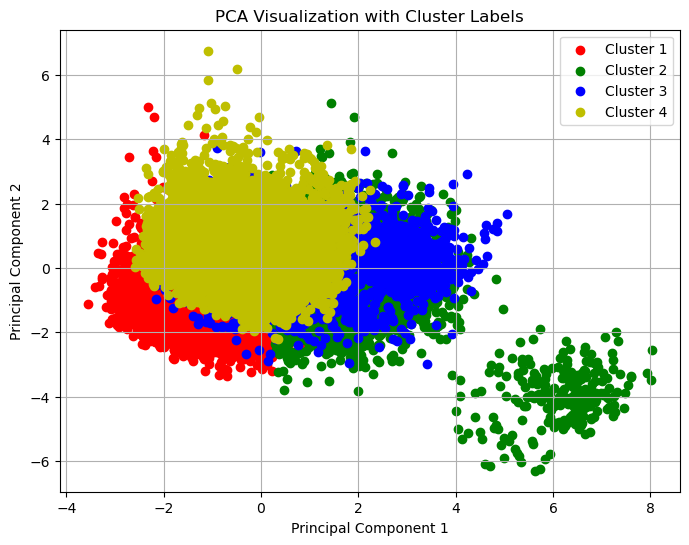

In [240]:
n_clusters = 4  # Adjust as needed

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to your data and get cluster assignments
cluster_labels = kmeans.fit_predict(scaled_data)

# Perform PCA with the desired number of components (e.g., 2 for 2D visualization)
pca = PCA(n_components=2)

# Fit and transform the clustered data using PCA
pca_result = pca.fit_transform(scaled_data)

# Create a color map for the clusters (ensure the number of colors matches the number of clusters)
colors = ['r', 'g', 'b','y',"m"]  # You can add more colors if you have more clusters

# Create a scatter plot with different colors for each cluster
plt.figure(figsize=(8, 6))
for cluster_id in range(n_clusters):
    cluster_mask = cluster_labels == cluster_id
    plt.scatter(
        pca_result[cluster_mask, 0],
        pca_result[cluster_mask, 1],
        label=f'Cluster {cluster_id + 1}',
        color=colors[cluster_id],
    )

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization with Cluster Labels')
plt.legend()
plt.grid(True)
plt.show()

there is a nice division between the two groups. None the less one group seems to be bigger than the other.

In [152]:
df["income"].describe()


count    48842.000000
mean         0.239282
std          0.426649
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

# KNN

In [162]:
X = data.drop(columns=['income'])
y = data['income']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
scaler = StandardScaler()

In [165]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
param_grid = {'n_neighbors':np.arange(1,10)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train_scaled,y_train)

C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [185]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8216159096301878
Best Parameters: {'n_neighbors': 8}


In [189]:
k = 8  # You can choose the value of K
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the KNN classifier on the training data
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# You can also print a classification report for more detailed metrics
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:", classification_rep)

C:\Users\mmeza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Accuracy: 0.83
Classification Report:               precision    recall  f1-score   support

           0       0.85      0.94      0.89      7479
           1       0.71      0.45      0.55      2290

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.83      0.81      9769



there seems to be again an issue with imbalanced data

Would be best to choose another model

In [194]:
data['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

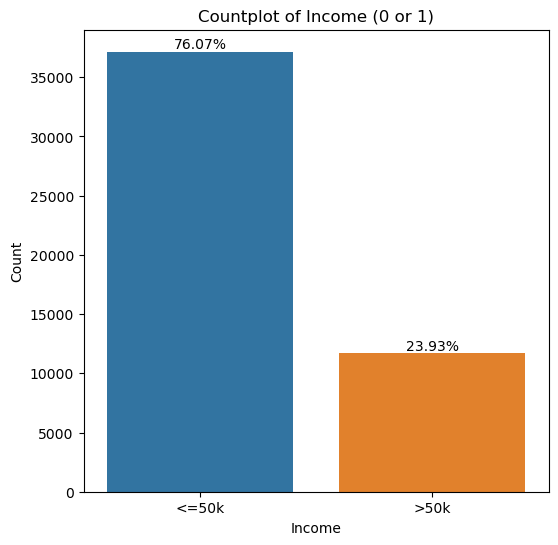

In [235]:
plt.figure(figsize=(6, 6))
ax = sns.countplot(x='income', data=df)
plt.title('Countplot of Income (0 or 1)')
plt.xlabel('Income')
plt.xticks([0, 1], ['<=50k', '>50k'])
plt.ylabel('Count')

# Calculate and display percentages on top of the bars
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{100 * height / total:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')

plt.show()

there are a lot more 0 than ones

a lot more people make <=50K 